### IMPORT LIBRARIES 

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### TASK 1: TO MERGE 12 MONTHS OF DATA 

In [222]:

files = [file for file in os.listdir("./Sales_Data")]

all_months_files = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_files = pd.concat([all_months_files, df])

all_months_files.head()
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### STORE DATA INTO SINGLE FILE 

In [223]:
all_months_files.to_csv("all_data.csv", index = False)

### TASK 2 : REMOVING NAN VALUE AND CONVERT STRING TO INTEGER 

### Method 1 to remove all NAN value 

In [224]:
df = pd.read_csv('all_data.csv')

In [225]:
nan_value = str("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Order ID"], inplace=True)

In [226]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [227]:
df.isnull().values.any()

False

### Method 2 to remove all NAN value 

In [228]:
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## TASK 2.1: ADD COLUMNS 

In [229]:
df = df[df['Order Date'].str[0:2]!='Or']

In [230]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


## TASK 2.2 CONVERT STRING TO INT QUANTITY AND PRICE AND THEN MAKE SALES COLUMN 

In [232]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('str').astype('int32')

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int32 
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(2), object(5)
memory usage: 9.9+ MB


In [234]:
df['Price Each'] = df['Price Each'].astype('str').astype('float')

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


In [236]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [237]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### TASK 2.3: GENERATE CITY COLUMN 

In [238]:
def get_city(add):
    return add.split(',')[1]

def get_state(add):
     return add.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x:get_city(x)+'('+get_state(x)+')')

# Alternate Solution
# df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles(CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco(CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco(CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco(CA)


## TASK 3: DATA EXPLORE 

### Question 1: What was the best month for sales? How much was earned that month?

In [254]:
x = df.groupby('Price Each').sum()
x

,Quantity Ordered,Month,Sales
Price Each,,,
2.99,31017,146370,92740.83
3.84,27635,145558,106118.40
11.95,23975,154819,286501.25
11.99,20557,133397,246478.43
14.95,23217,153092,347094.15
99.99,13457,94113,1345565.43
109.99,4129,29336,454148.71
149.99,7550,52558,1132424.50
150.00,15661,109477,2349150.00


In [239]:
# using groupby function
result = df.groupby('Month').sum()
result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


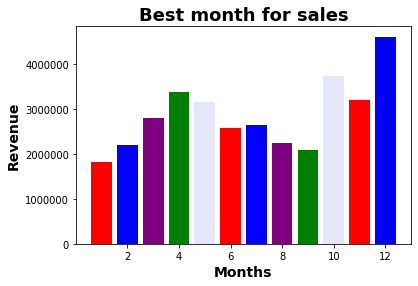

In [240]:
# using Data visualization techni
Month = range(1, 13)
plt.bar(Month,result['Sales'],color=['red', 'blue', 'purple', 'green', 'lavender'])
plt.title("Best month for sales",fontsize=18, fontweight='bold')
plt.xlabel("Months",fontsize=14, fontweight='bold')
plt.ylabel("Revenue",fontsize=14, fontweight='bold')
plt.show()

### Question 2: What city sold the most product? 

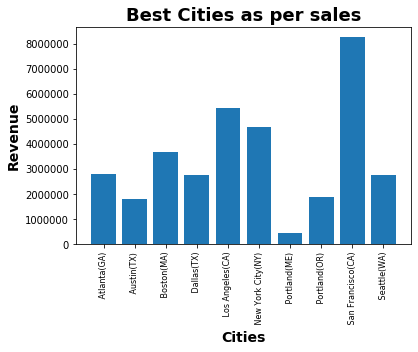

In [241]:
# using Data visualization techni
keys = [city for city, df in df.groupby(['City'])]
plt.bar(keys,df.groupby(['City']).sum()['Sales'])

plt.title("Best Cities as per sales",fontsize=18, fontweight='bold')
plt.xticks(keys,rotation='vertical',size = 8)
plt.xlabel("Cities",fontsize=14, fontweight='bold')
plt.ylabel("Revenue",fontsize=14, fontweight='bold')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product? 

In [164]:
# first convert date and time seperate
df['Order Date'] = pd.to_datetime(df['Order Date'])
# add column hour
df['Hour'] = df['Order Date'].dt.hour
# add column minutes
df['Minute'] = df['Order Date'].dt.minute

In [165]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


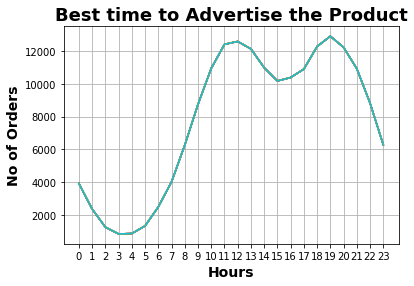

In [166]:
keys = [hour for hour, df in df.groupby('Hour')]
plt.plot(keys,df.groupby(['Hour']).count())
plt.xticks(keys)
plt.grid()
plt.title('Best time to Advertise the Product',fontsize=18, fontweight='bold')
plt.xlabel("Hours",fontsize=14, fontweight='bold')
plt.ylabel("No of Orders",fontsize=14, fontweight='bold')
plt.show()

## BEST TIME TO ADD IS MORNING 11-12 AM AND EVENING 6-8 PM

### Question 4: What products are most often sold together?

In [167]:
df = df[df['Order ID'].duplicated(keep = False)]
df['Grouped'] =df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


C:\Users\geetc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [168]:
df2 = df[['Order ID','Grouped']].drop_duplicates()
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [174]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


### Question 6:What product sold the most? Why do you think it sold the most? 

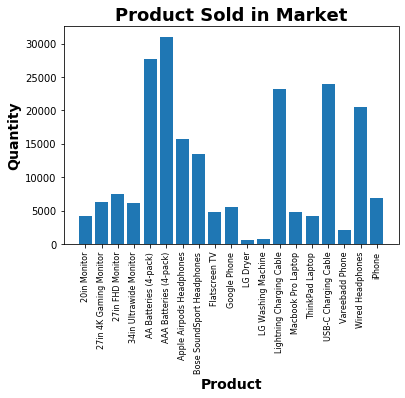

In [244]:
keys = [pair for pair, df in df.groupby(['Product'])]
plt.bar(keys,df.groupby(['Product']).sum()['Quantity Ordered'])
plt.title("Product Sold in Market",fontsize=18, fontweight='bold')
plt.xticks(keys,rotation='vertical',size = 8)
plt.xlabel("Product",fontsize=14, fontweight='bold')
plt.ylabel("Quantity",fontsize=14, fontweight='bold')
plt.show()

C:\Users\geetc\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


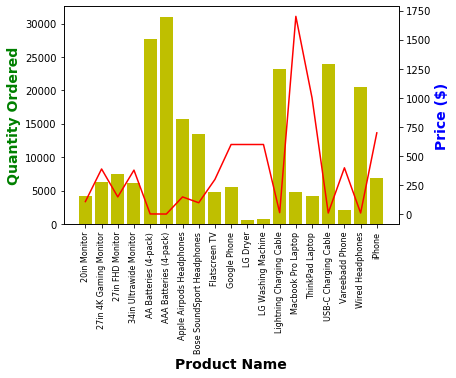

In [247]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys,df.groupby(['Product']).sum()['Quantity Ordered'], color='y')
ax2.plot(keys, prices, color='r')

ax1.set_xlabel('Product Name',fontsize=14, fontweight='bold')
ax1.set_ylabel('Quantity Ordered',fontsize=14, fontweight='bold', color='g')
ax2.set_ylabel('Price ($)',fontsize=14, fontweight='bold', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()